In [2]:
%load_ext autoreload
%autoreload 2
# use IPython extension to automatically reload the imported modules; 
# otherwise after editing a module, changes will not be effective without kernel restart

from globalvars import *
from preprocessings import *

In [3]:
data_buf, descriptions = initialization()
#   data_buf = {'power':[array([time,val]),...], 'force':[array([time,val]),...]}
#   descriptions.columns.values # column titles
#   descriptions.iloc[0,:] ordescriptions.loc[1,:]   # get the first row with attributes

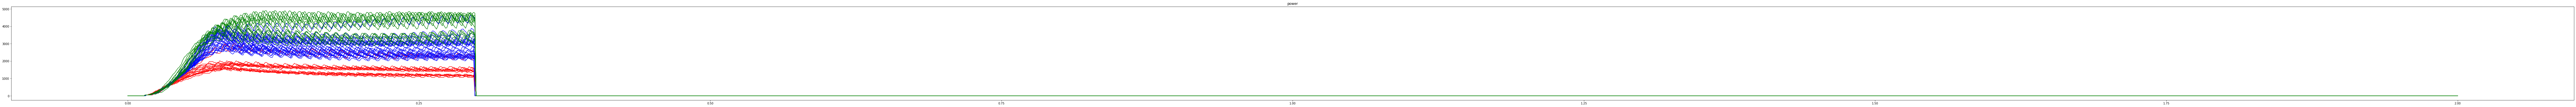

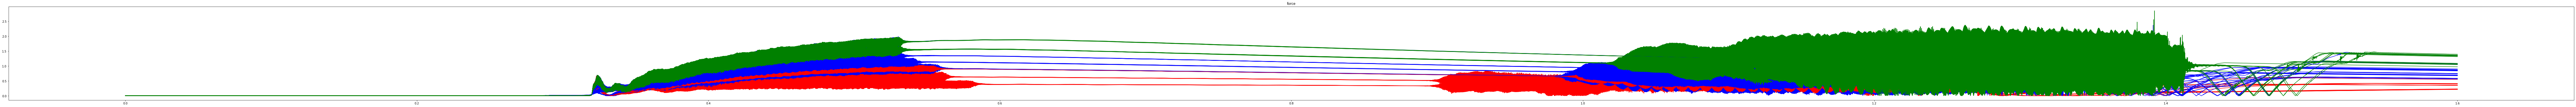

In [13]:
# data visualization

for signal in signal_type:
    fig = plt.figure(figsize = (160, 6))
    class_color={'I':'r', 'II':'g', 'III':'b'}
    l = len(data_buf[signal])
    for i in range(l):
        color_tmp = class_color[descriptions.loc[i+1,'Class Label']]
        plt.title(signal)
        plt.plot(data_buf[signal][i][:,0],data_buf[signal][i][:,1],color=color_tmp)
    plt.show()

In [4]:
### 1. preprocessing

data,seg_ind = segment_all(data_buf)

D:\Users\Frank222\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


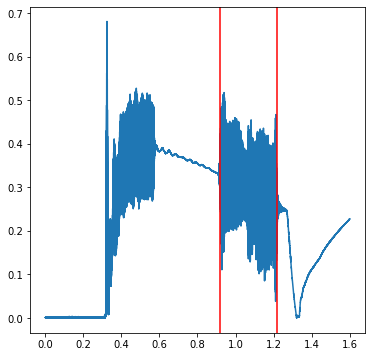

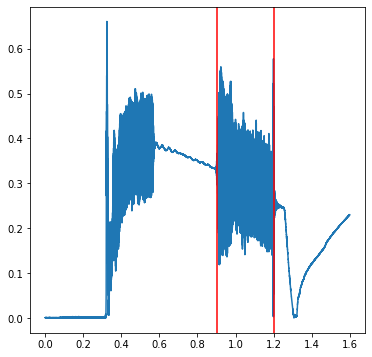

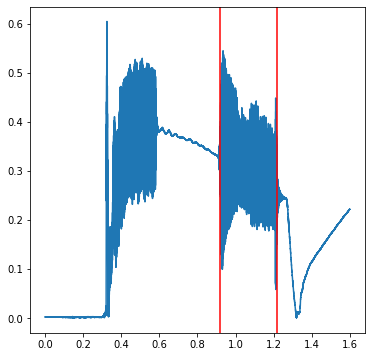

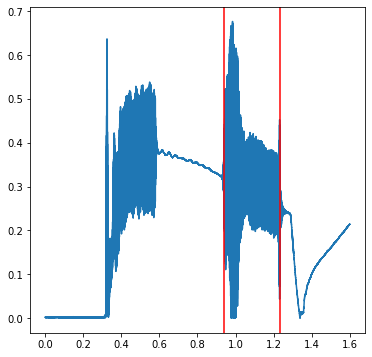

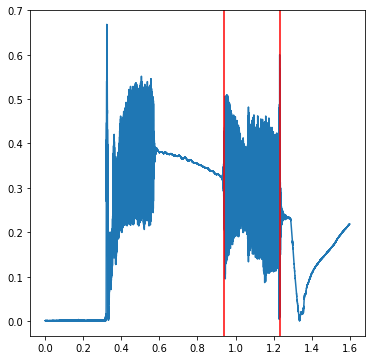

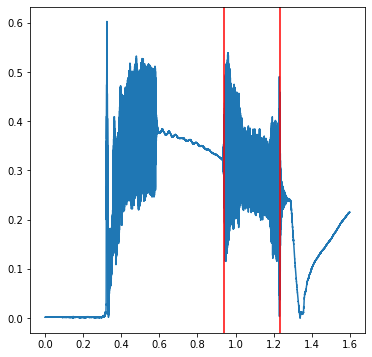

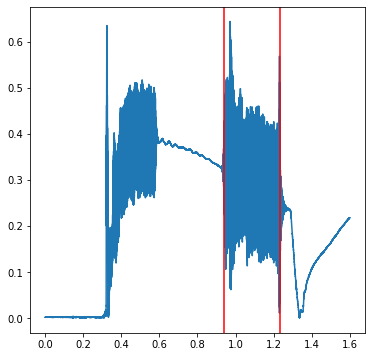

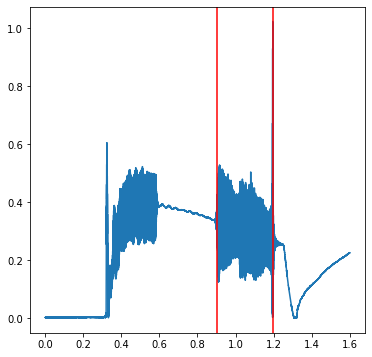

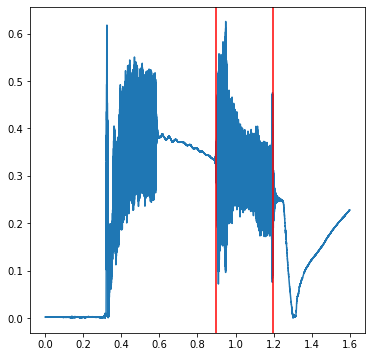

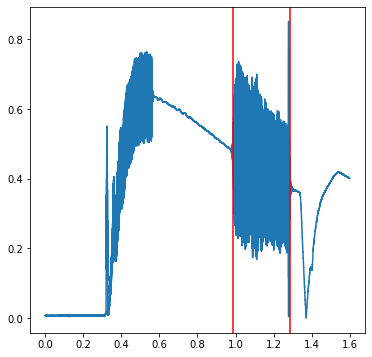

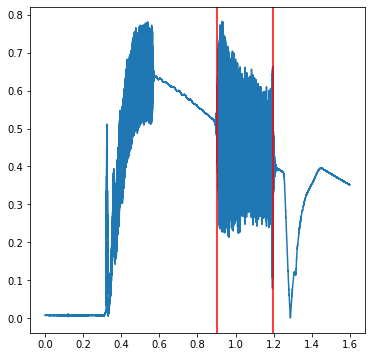

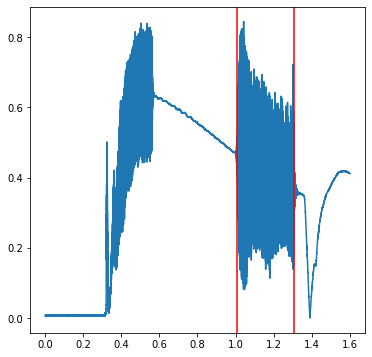

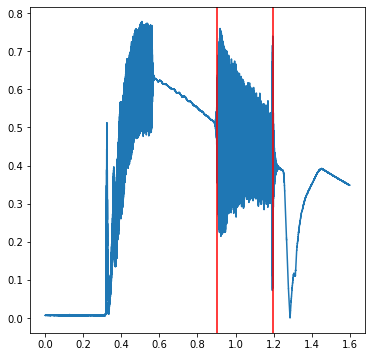

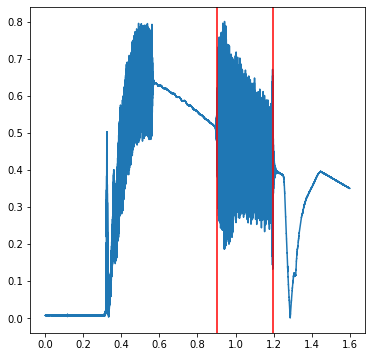

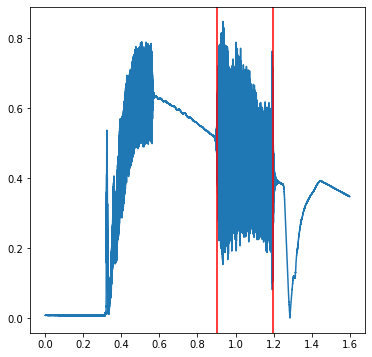

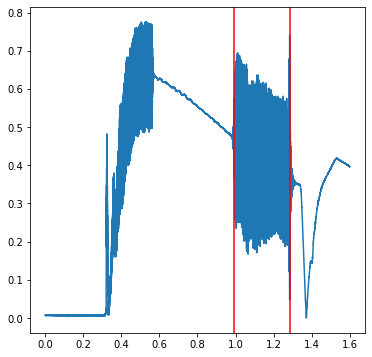

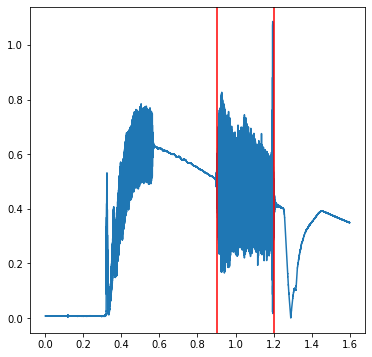

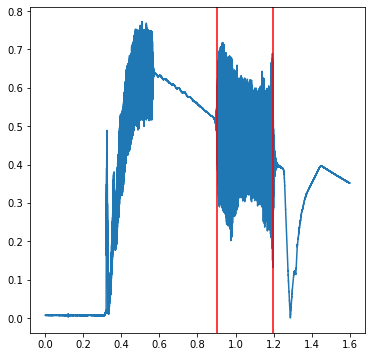

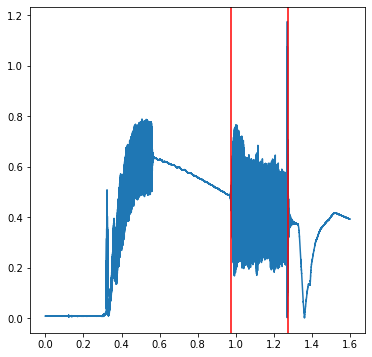

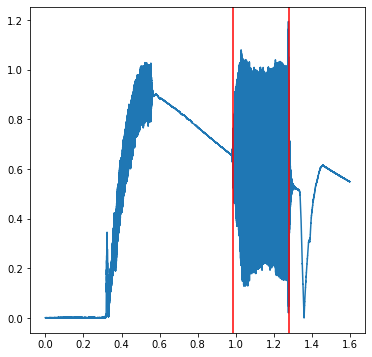

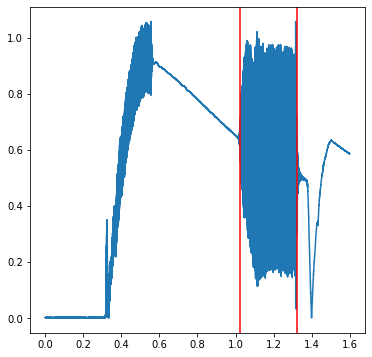

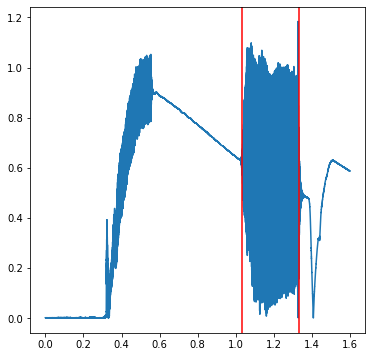

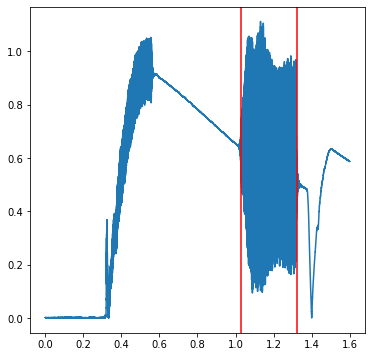

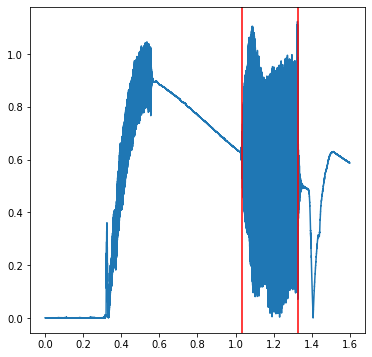

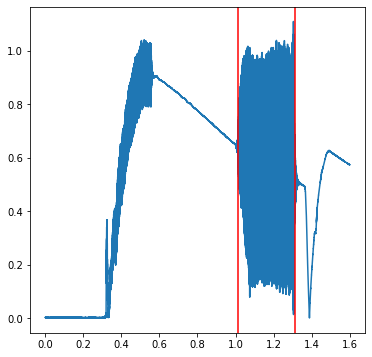

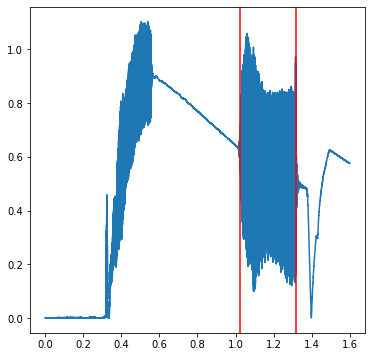

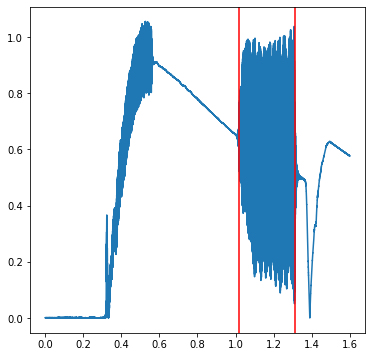

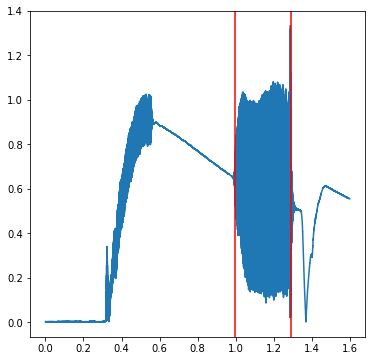

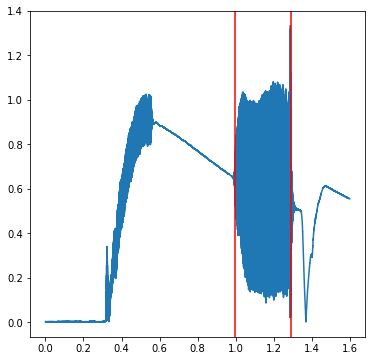

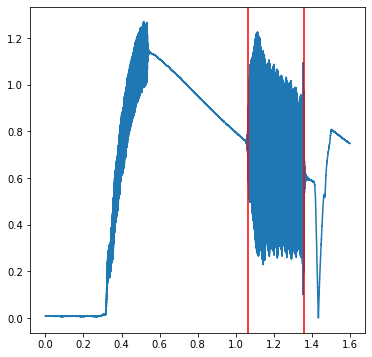

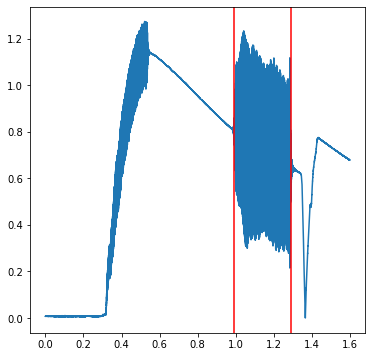

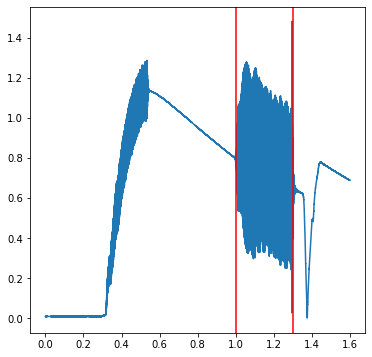

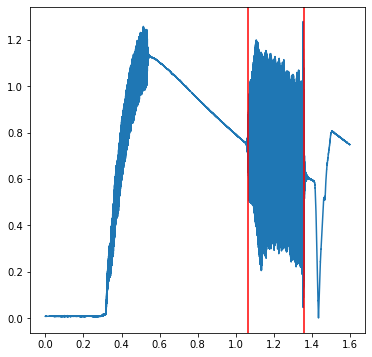

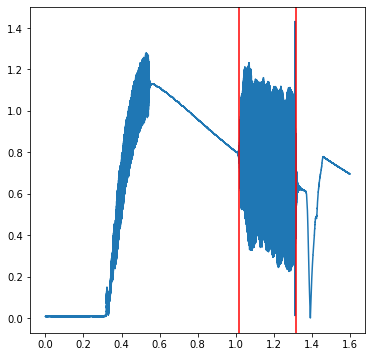

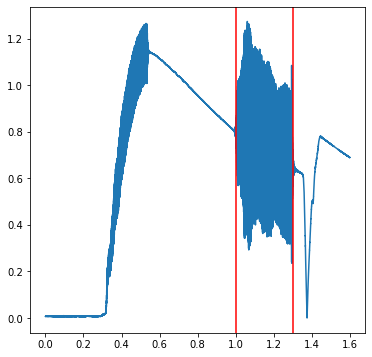

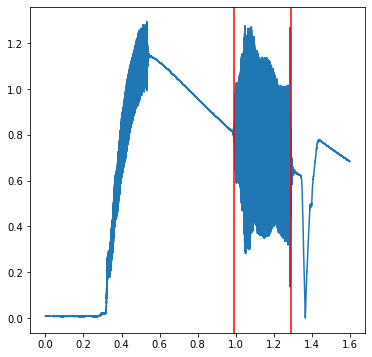

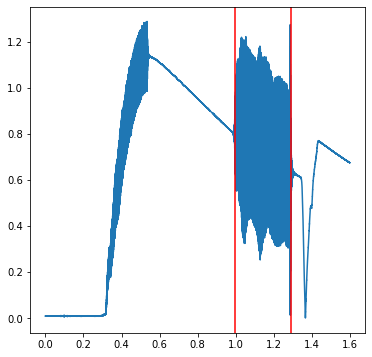

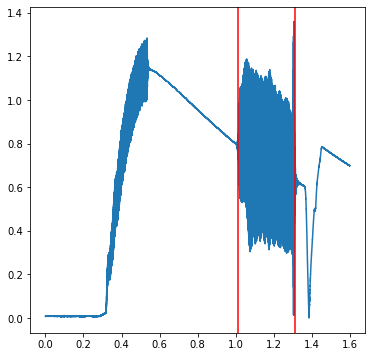

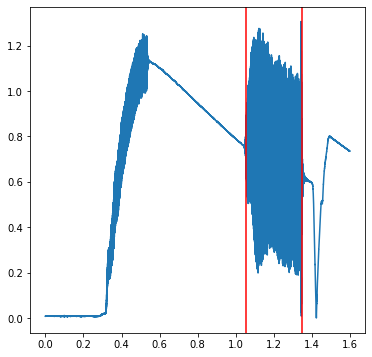

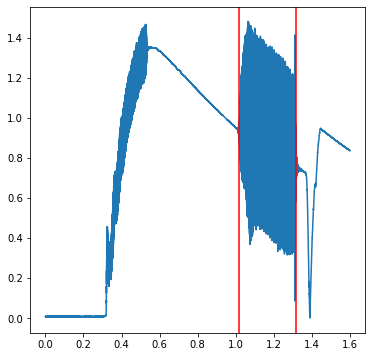

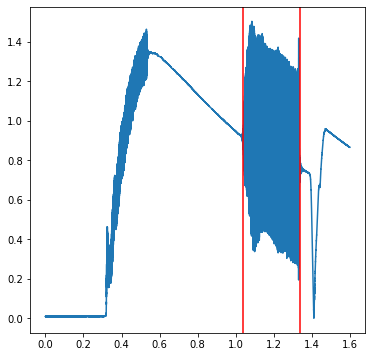

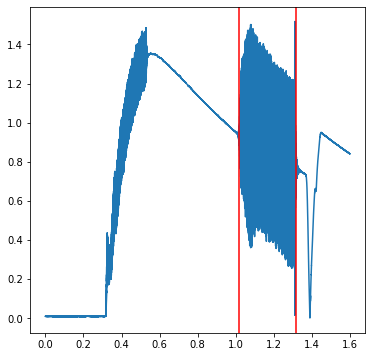

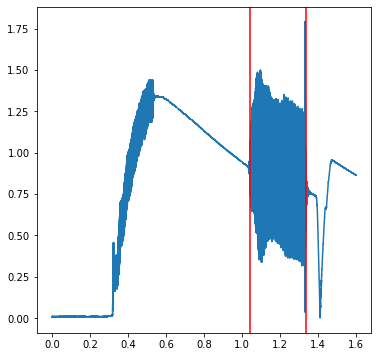

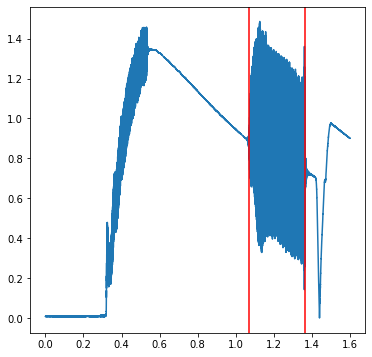

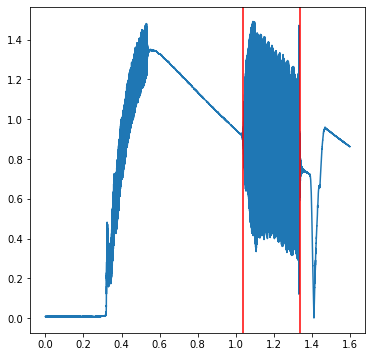

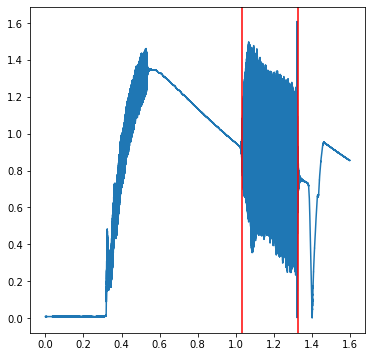

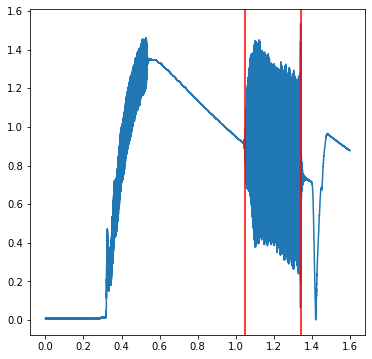

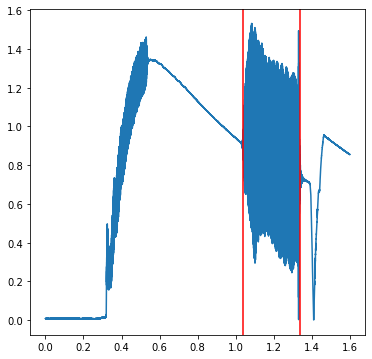

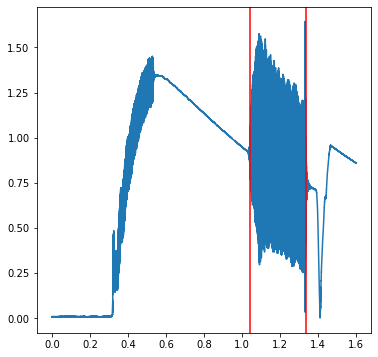

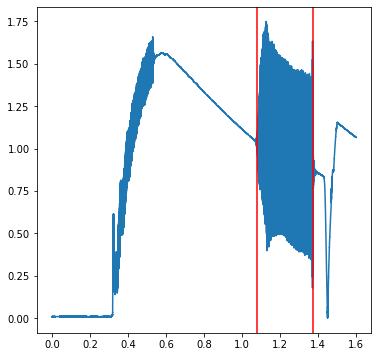

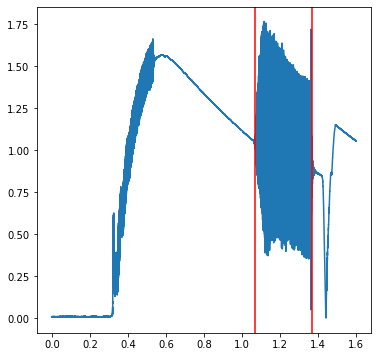

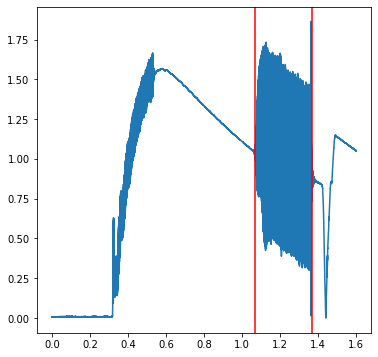

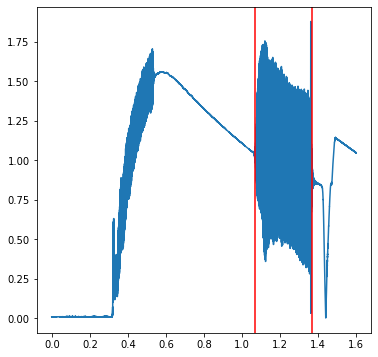

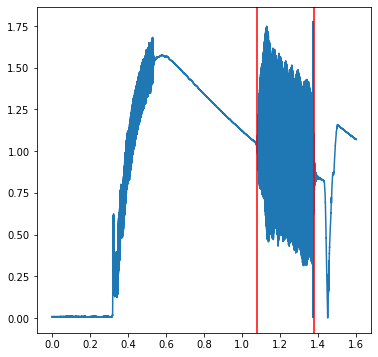

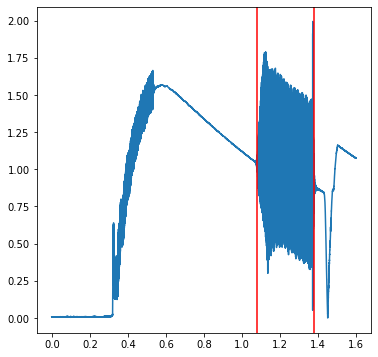

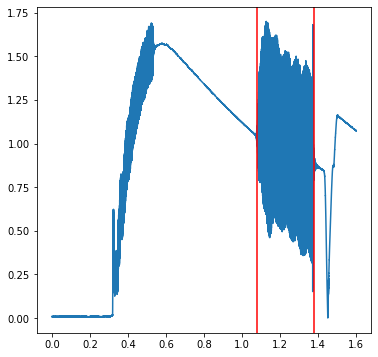

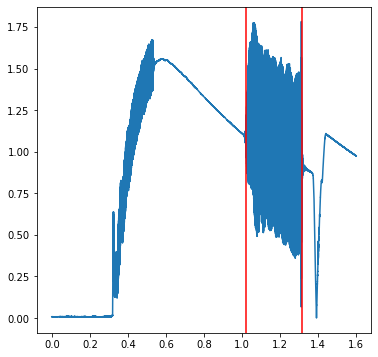

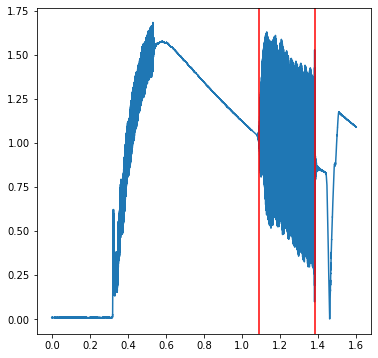

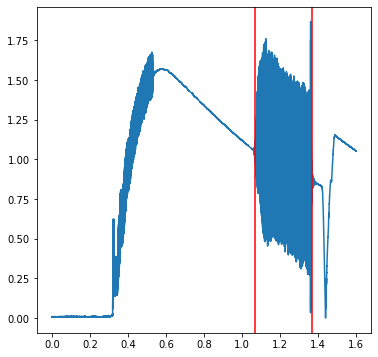

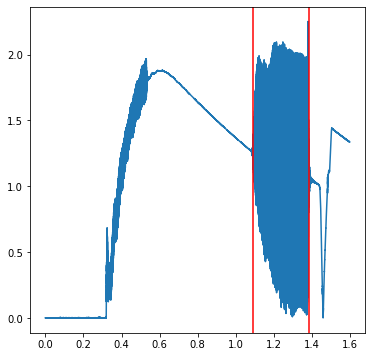

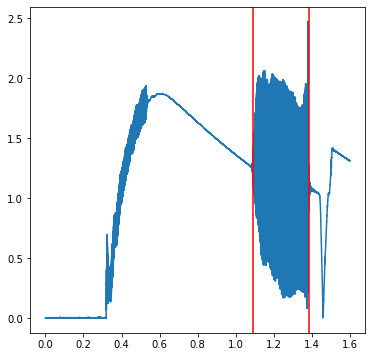

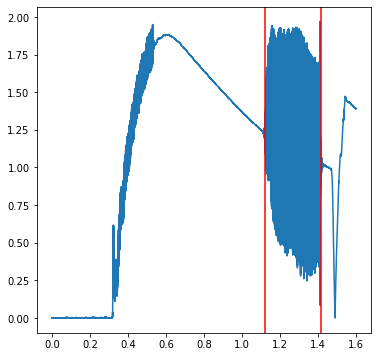

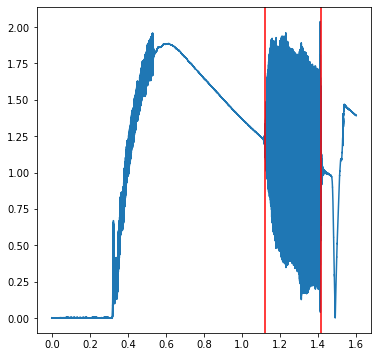

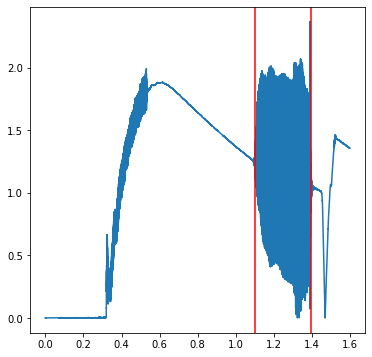

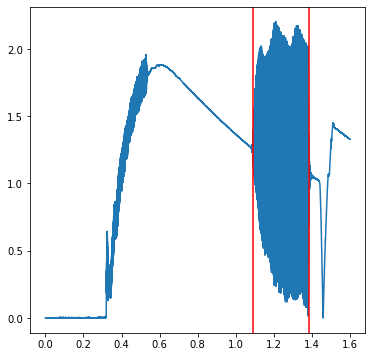

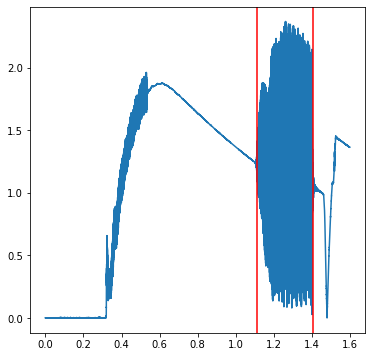

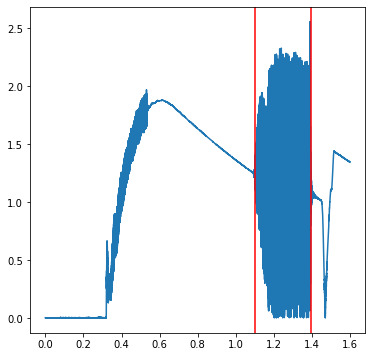

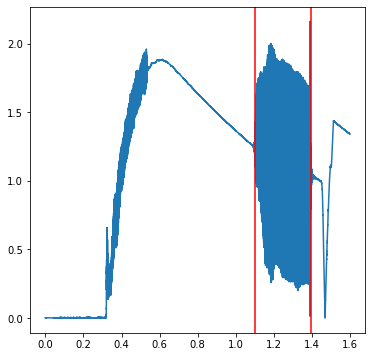

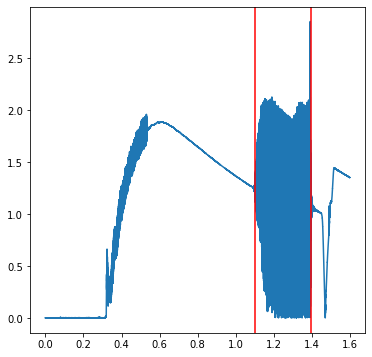

In [4]:
# segmented force signal
for i,sig in enumerate(data_buf['force']):
    fig = plt.figure(figsize=(6, 6))
    plt.plot(sig[:,0],sig[:,1])
    for ind in seg_ind['force'][i]:
        plt.axvline(x=sig[ind,0],color='r')

E:\Users\Frank222\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


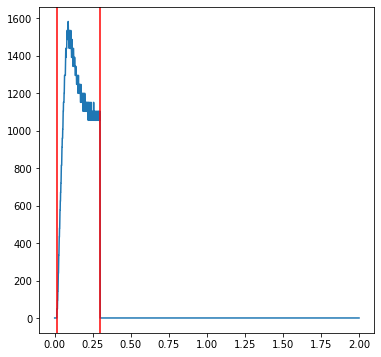

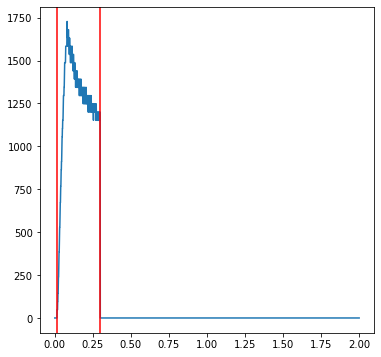

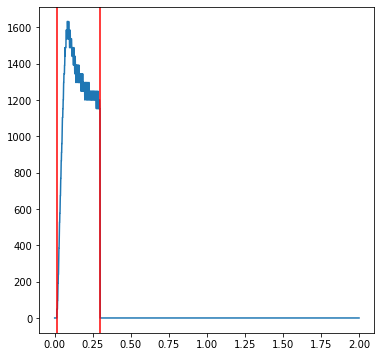

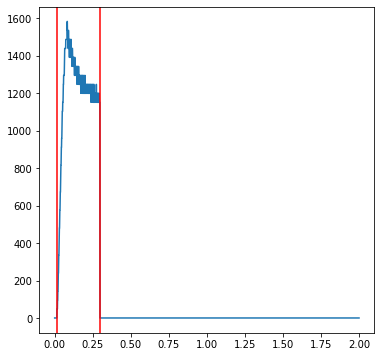

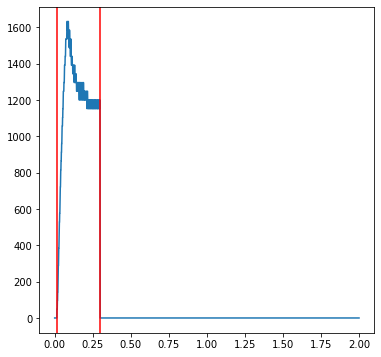

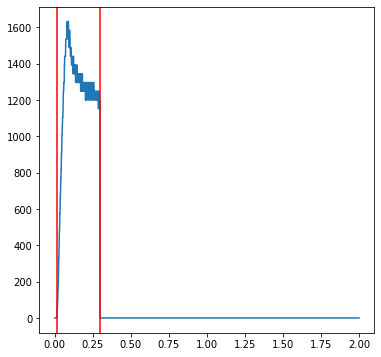

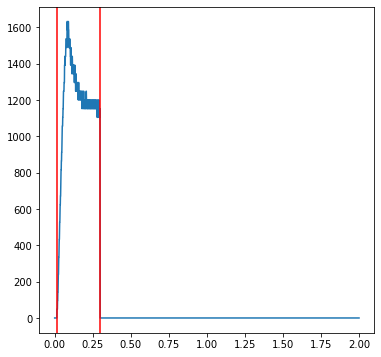

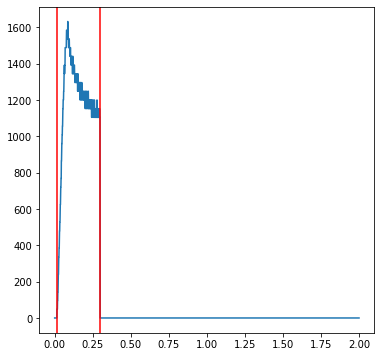

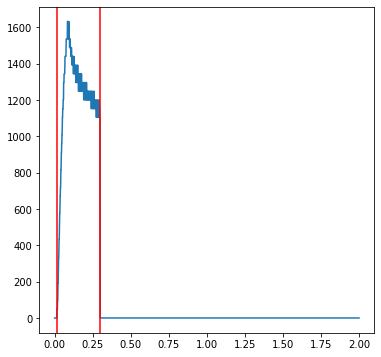

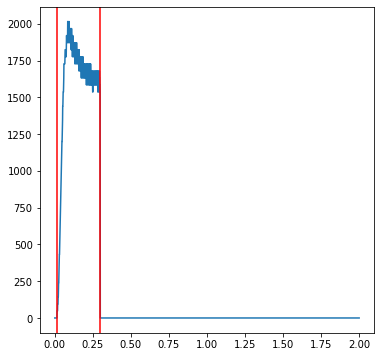

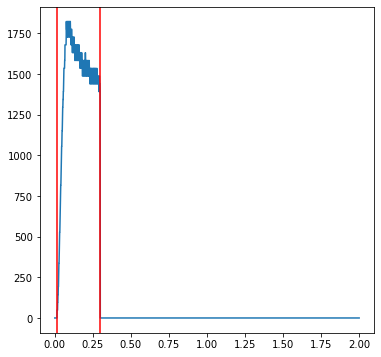

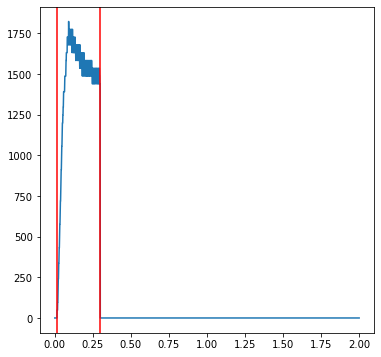

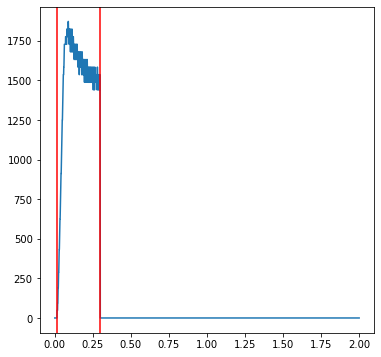

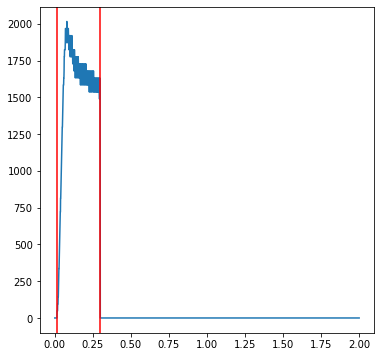

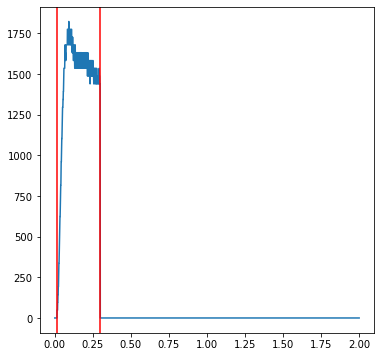

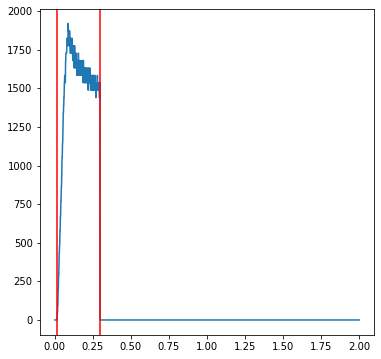

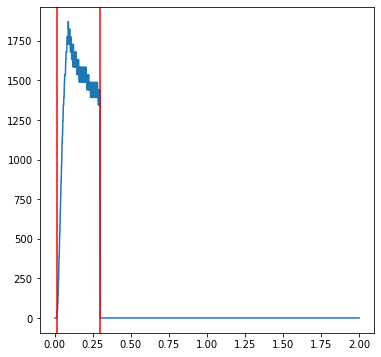

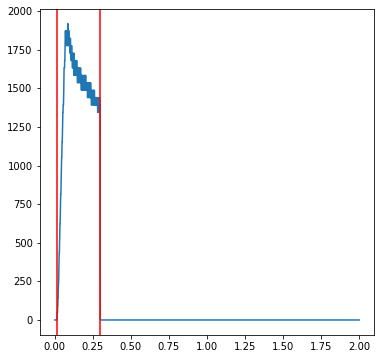

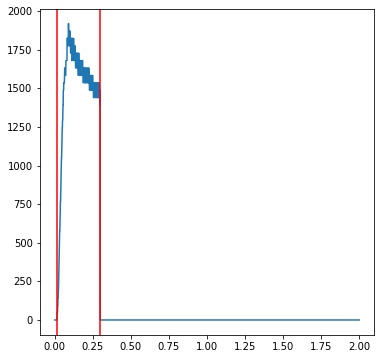

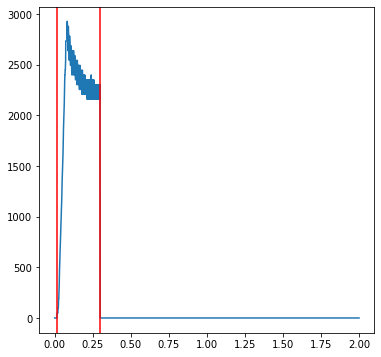

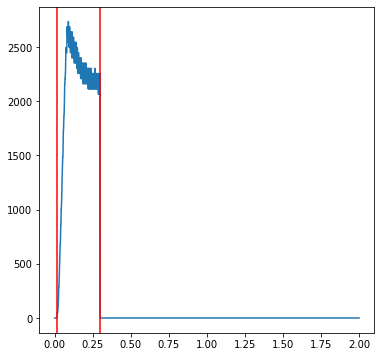

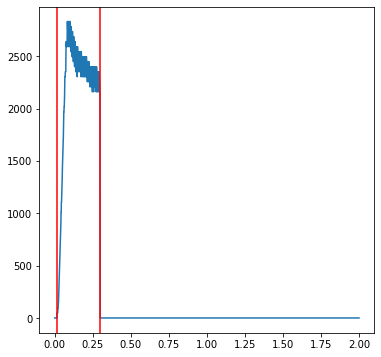

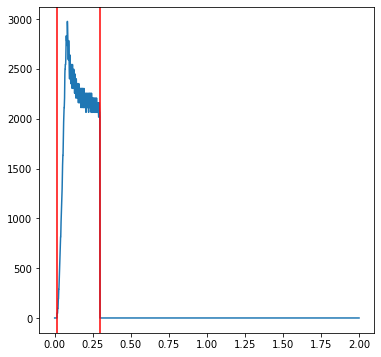

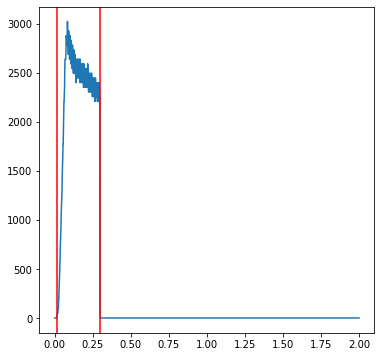

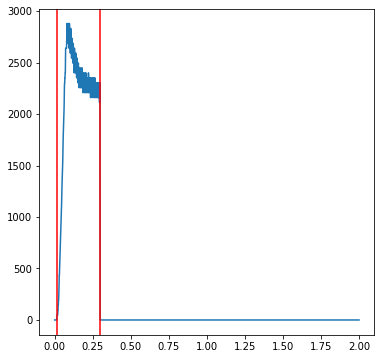

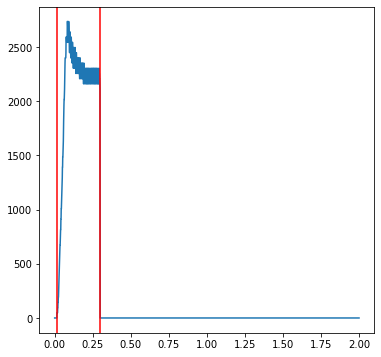

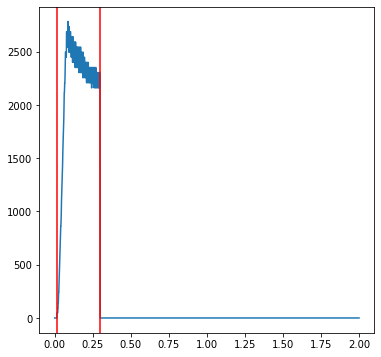

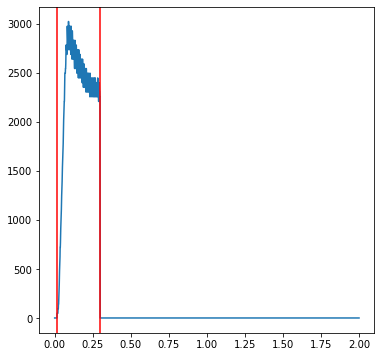

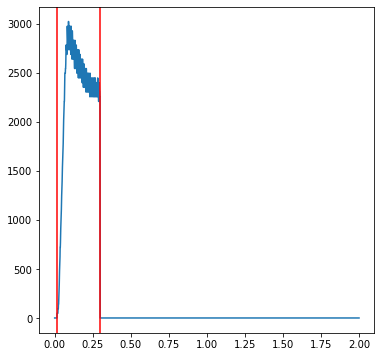

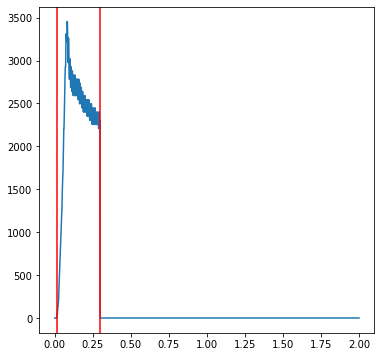

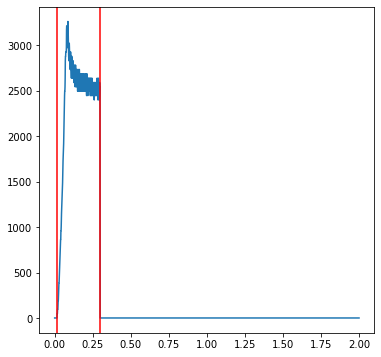

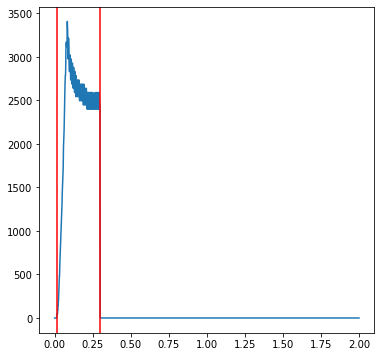

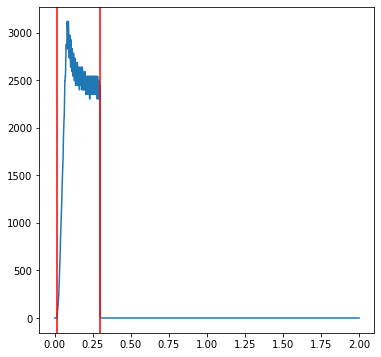

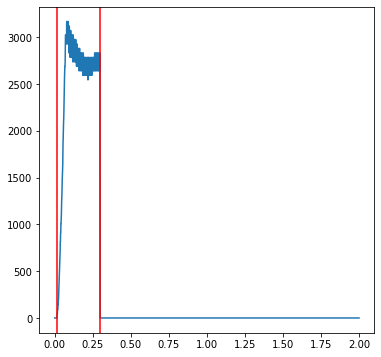

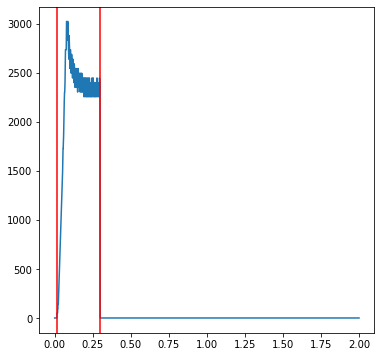

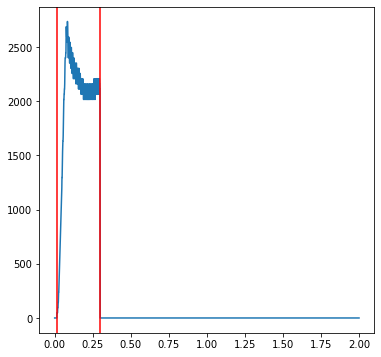

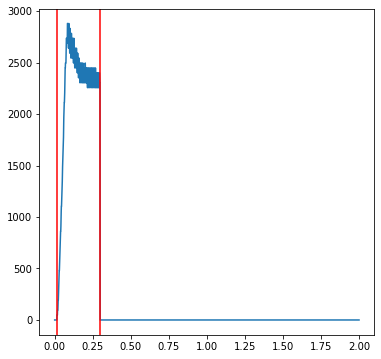

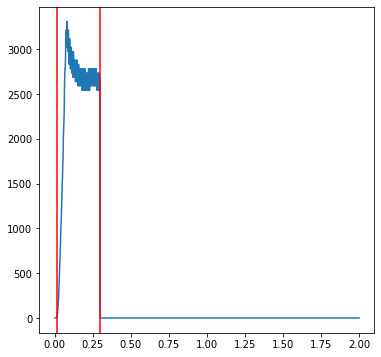

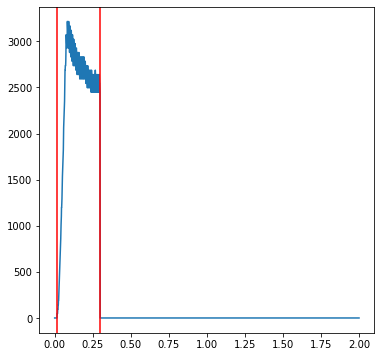

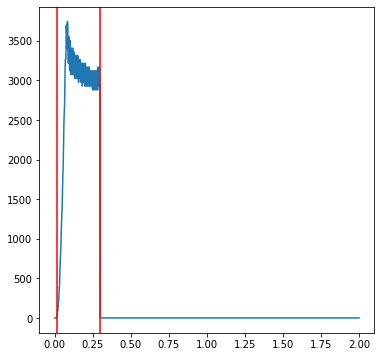

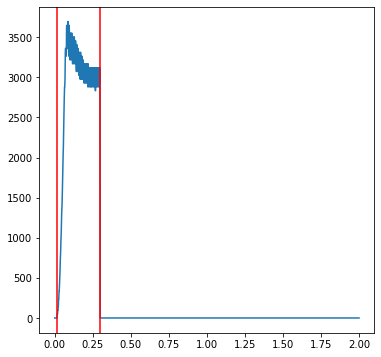

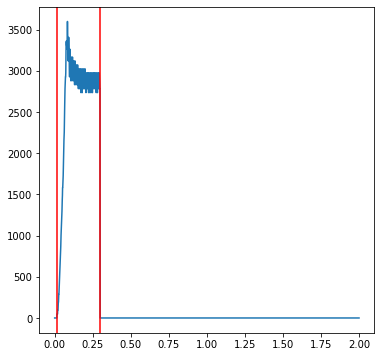

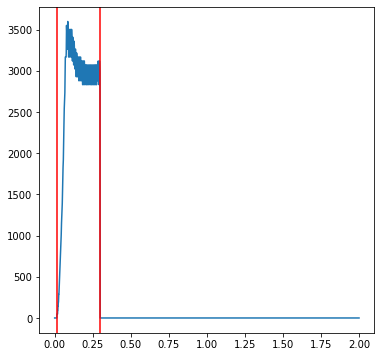

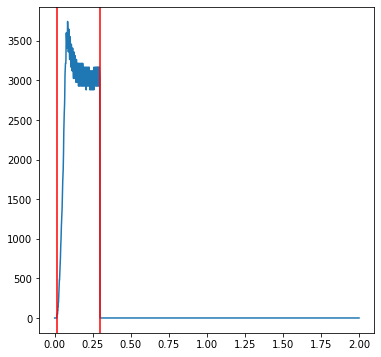

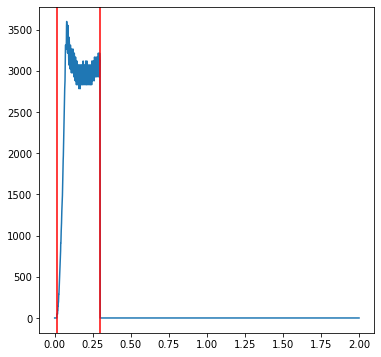

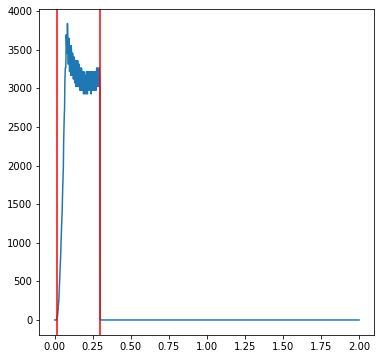

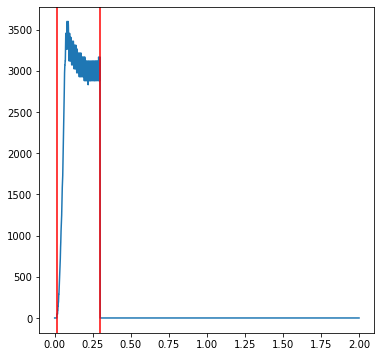

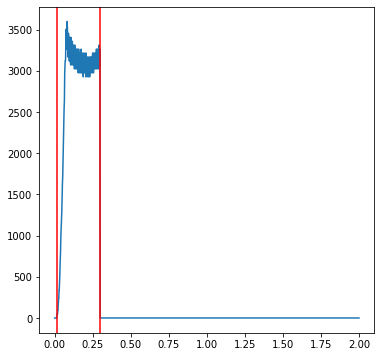

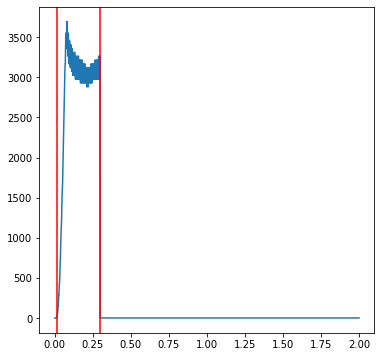

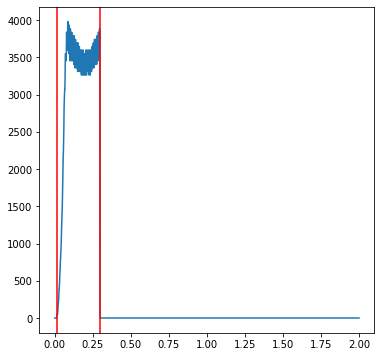

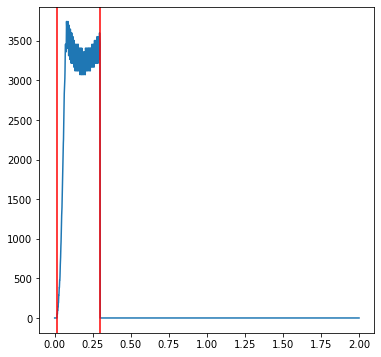

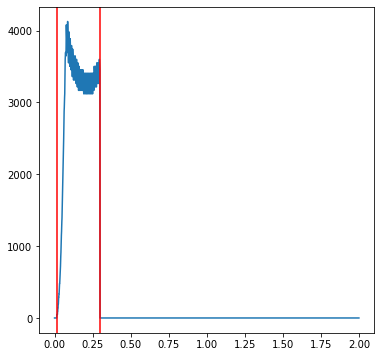

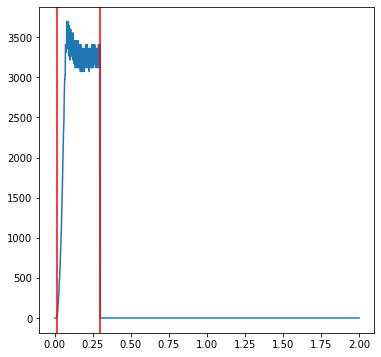

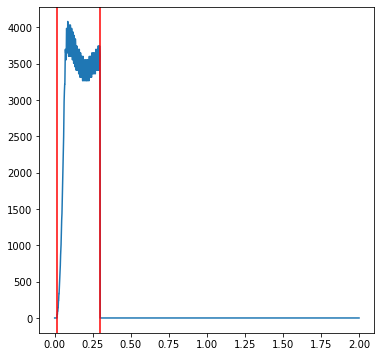

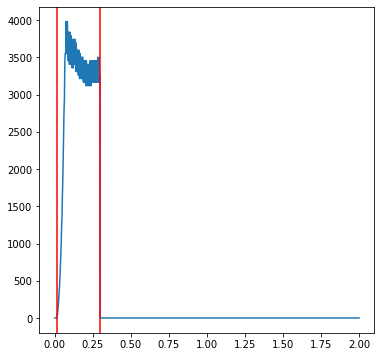

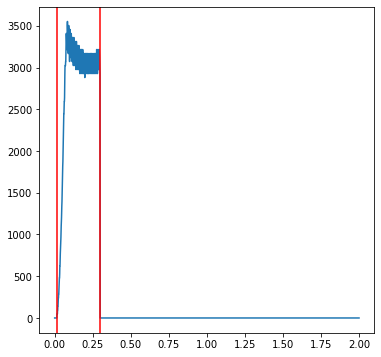

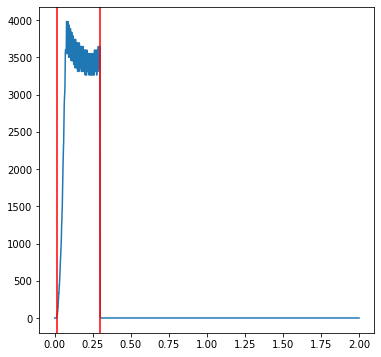

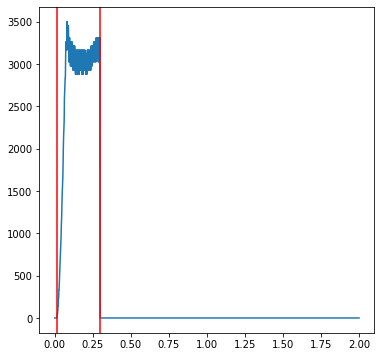

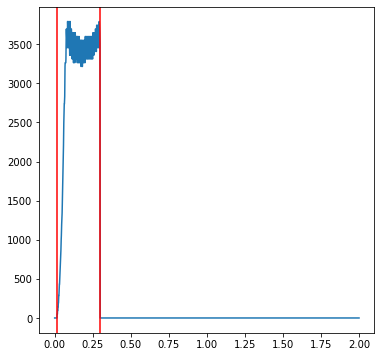

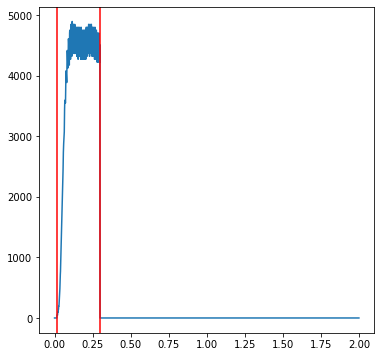

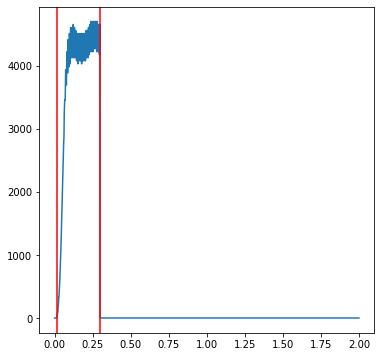

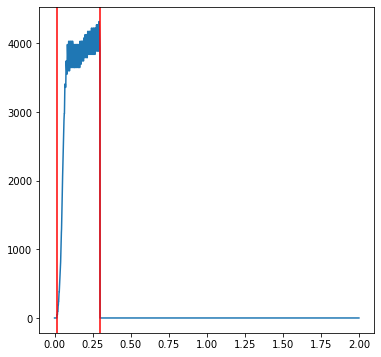

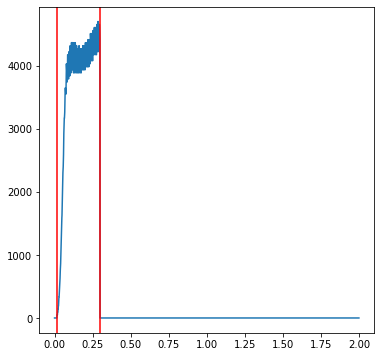

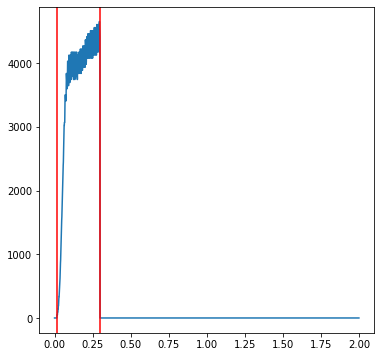

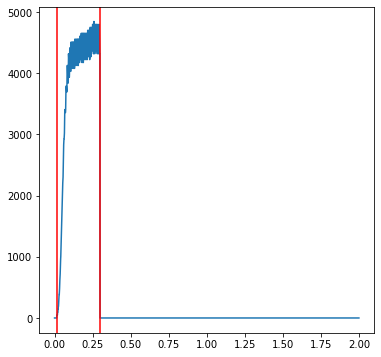

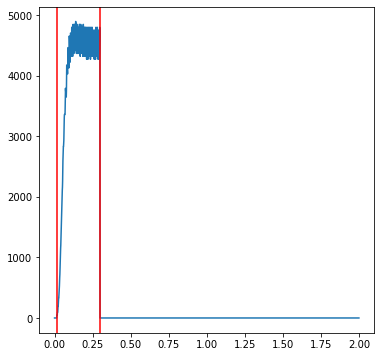

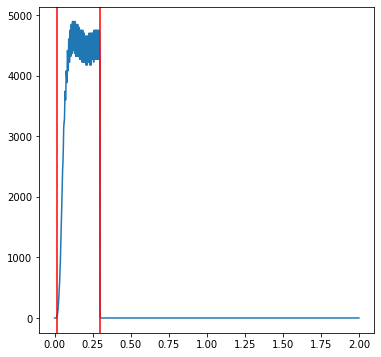

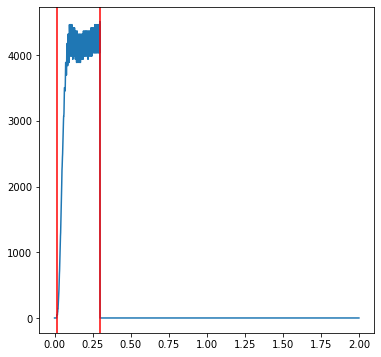

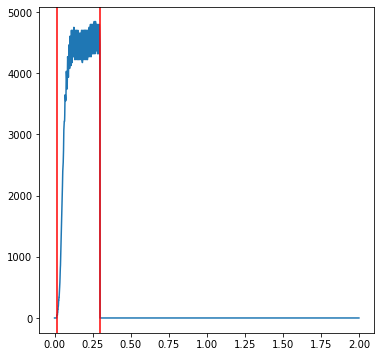

In [11]:
# segmented power signal
for i,sig in enumerate(data_buf['power']):
    fig = plt.figure(figsize=(6, 6))
    plt.plot(sig[:,0],sig[:,1])
    for ind in seg_ind['power'][i]:
        plt.axvline(x=sig[ind,0],color='r')

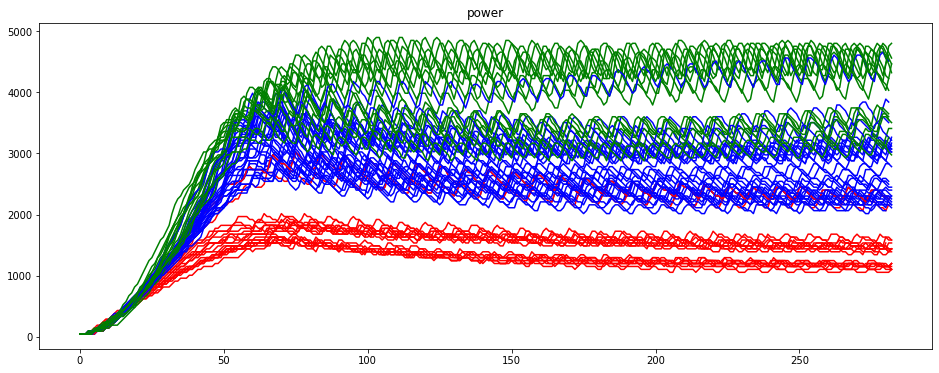

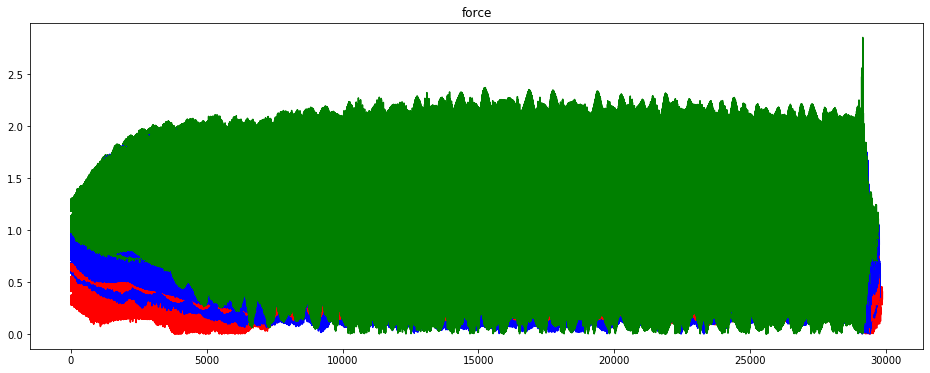

In [26]:
# preprocessed data visualization
for signal in signal_type:
    fig = plt.figure(figsize = (16, 6))
    class_color={'I':'r', 'II':'g', 'III':'b'}
    l = len(data[signal])
    for i in range(l):
        color_tmp = class_color[descriptions.loc[i+1,'Class Label']]
        plt.title(signal)
        plt.plot(data[signal][i][:,1],color=color_tmp)
    plt.show()

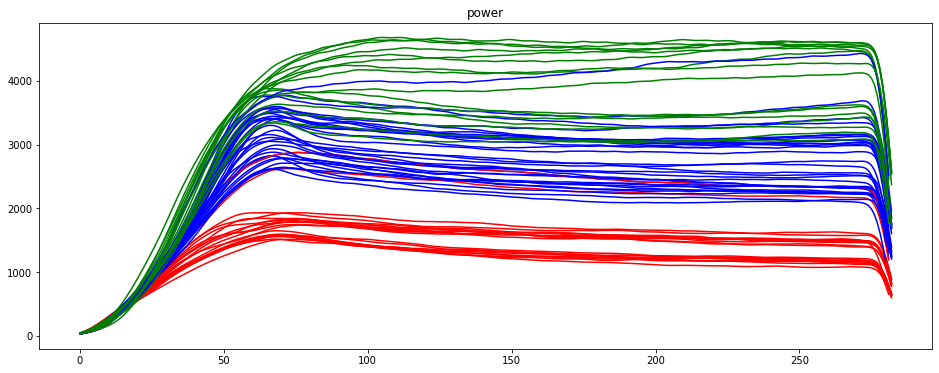

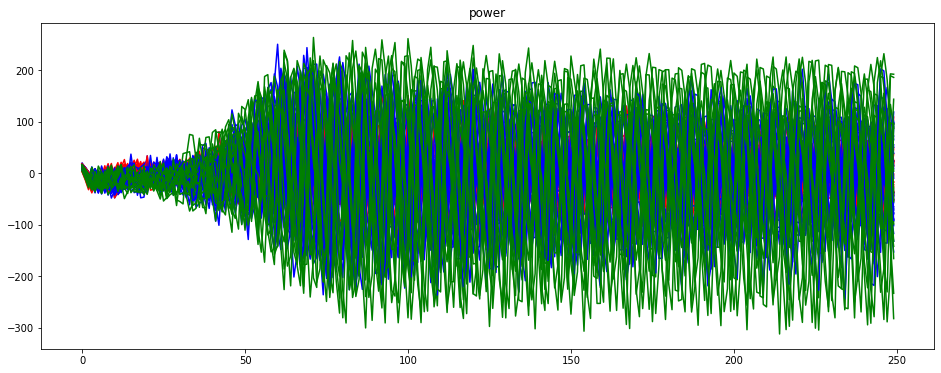

In [9]:
low_pass_fir_filter=pd.read_csv(data_path+'eqnum.csv',header=None).values[0]

# low_pass and high-pass
fig = plt.figure(figsize = (16, 6))
class_color={'I':'r', 'II':'g', 'III':'b'}
l = len(data['power'])
for i in range(l):
    color_tmp = class_color[descriptions.loc[i+1,'Class Label']]
    plt.title('power')
    plt.plot(np.convolve(data['power'][i][:,1],low_pass_fir_filter,'same'),color=color_tmp)
plt.show()

fig = plt.figure(figsize = (16, 6))
for i in range(l):
    color_tmp = class_color[descriptions.loc[i+1,'Class Label']]
    plt.title('power')
    plt.plot(data['power'][i][:250,1]-np.convolve(data['power'][i][:,1],low_pass_fir_filter,'same')[:250],color=color_tmp)
plt.show()

In [5]:
### 2. feature generation
from features import *

features = {label:[] for label in feat_labels}

### a. using information in 'discriptions' to fill features

features['welding_pressure'] = descriptions['Pressure [psi]'].tolist()
features['post_height'] = descriptions['Height [mm]'].tolist()
features['pre_height'] = descriptions['PreHeight [mm]'].tolist()
features['height_change'] = (descriptions['Height [mm]']-descriptions['PreHeight [mm]']).tolist()

### b. using information in data['power'] to fill features

tmp = data['power']
for sig in tmp:
    for label in feat_labels[4:8]:
        features[label].append(feature_gen_time(sig, label))

### c. using information in data['force'] to fill features

tmp = data['force']
for sig in tmp:
    for label in feat_labels[8:12]:
        features[label].append(feature_gen_freq(sig, label))


In [6]:
features

{'welding_pressure': [10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  40,
  40,
  40,
  40,
  40,
  40,
  40,
  40,
  40,
  40,
  50,
  50,
  50,
  50,
  50,
  50,
  50,
  50,
  50,
  50,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  75,
  75,
  75,
  75,
  75,
  75,
  75,
  75,
  75,
  75],
 'pre_height': [0.81,
  0.83,
  0.78,
  0.81,
  0.83,
  0.83,
  0.81,
  0.8,
  0.8,
  0.75,
  0.76,
  0.74,
  0.76,
  0.76,
  0.76,
  0.72,
  0.75,
  0.74,
  0.76,
  0.79,
  0.79,
  0.77,
  0.78,
  0.77,
  0.78,
  0.79,
  0.79,
  0.77,
  0.79,
  0.74,
  0.74,
  0.74,
  0.73,
  0.76,
  0.73,
  0.74,
  0.74,
  0.73,
  0.74,
  0.69,
  0.74,
  0.74,
  0.74,
  0.74,
  0.74,
  0.73,
  0.74,
  0.71,
  0.71,
  0.72,
  0.67,
  0.68,
  0.72,
  0.74,
  0.71,
  0.72,
  0.73,
  0.74,
  0.68,
  0.68,
  0.68,
  0.64,
  0.68,
  0.68,
  0.64,
  0.68,
  0.68,
  0.68,
  0.67],


In [7]:
def fisher_ratio(f1,f2):
    miu1 = np.mean(f1)
    miu2 = np.mean(f2)
    
    sigma1_square = pvariance(f1)
#     print(sigma1_square)
    sigma2_square = pvariance(f2)
#     print(sigma2_square)
    
#     l1=len(f1); l2=len(f2);
#     return np.power(miu1-miu2,2)*l1*l2/(l1*sigma1_square + l2*sigma2_square)/(l1+l2)
    return np.power(miu1-miu2,2)/(sigma1_square + sigma2_square)

# print(fisher_ratio(np.array([2,2]),np.array([1,3])))

In [8]:
### 3. Fisher's ratio
welding_class = descriptions.loc[:,'Class Label'].values
classes = ['I','II','III']
class_index = {}
for c in classes:
    class_index[c] = np.where(welding_class == c)[0]

features_Fisher_ratio = {}
for label in feat_labels:
    features_Fisher_ratio[label] = []
    tmp = np.array(features[label])
    for c in classes[:2]:
        f_rat = fisher_ratio(tmp[class_index['III']],tmp[class_index[c]])
        features_Fisher_ratio[label].append(f_rat)

D:\Users\Frank222\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [9]:
features_Fisher_ratio

{'welding_pressure': [4.531673855251736, 3.5471949084051726],
 'pre_height': [0.8193508746041789, 1.4088265666612372],
 'post_height': [1.9242975250746308, 2.88150334250005],
 'height_change': [2.5285455721594565, 3.014764687788375],
 'time_f1': [5.641629443228437, 2.5751626628088555],
 'time_f2': [5.090391448146227, 2.54948850516157],
 'time_f3': [1.359772702679647, 1.5075038817653328],
 'time_f4': [5.201709247260846, 2.307315001648626],
 'freq_f1': [nan, nan],
 'freq_f2': [2.9443268425473224, 3.322460210738139],
 'freq_f3': [0.1011596416036717, 0.06672451873800593],
 'freq_f4': [4.111470122413638, 1.6981431908057443]}

['time_f1', 'welding_pressure', 'time_f2']


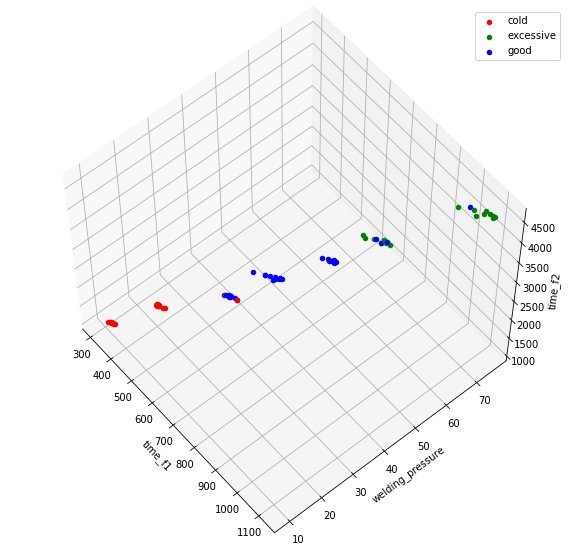

In [15]:
### 4. Feature selection
from heapq import nlargest
from mpl_toolkits import mplot3d

feature_f_rat_sum = {label:np.sum(features_Fisher_ratio[label]) for label in feat_labels[:8]}
maxFeatures = nlargest(3, feature_f_rat_sum, key = feature_f_rat_sum.get)
print(maxFeatures)

# visualize features
labels = descriptions['Class Label'].tolist()
x = features[maxFeatures[0]]
y = features[maxFeatures[1]]
z = features[maxFeatures[2]]
figure = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# print(ax.azim,ax.elev)
ax.view_init(azim=-40,elev=60)
for i in range(len(labels)):
    if labels[i] == 'I':
        cold = ax.scatter(x[i],y[i],z[i], c = 'r')
    elif labels[i] == 'II':
        excessive = ax.scatter(x[i],y[i],z[i], c = 'g')
    elif labels[i] == 'III':
        good = ax.scatter(x[i],y[i],z[i], c = 'b')
ax.set_xlabel(maxFeatures[0])
ax.set_ylabel(maxFeatures[1])
ax.set_zlabel(maxFeatures[2])
ax.legend([cold, excessive, good], ['cold', 'excessive', 'good'])

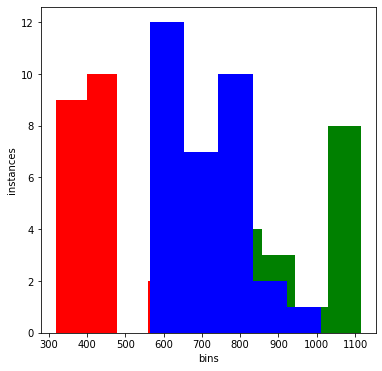

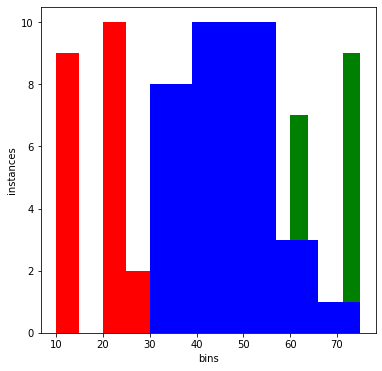

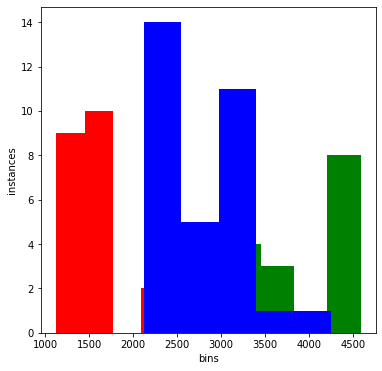

In [14]:
### 5. Classification
import math

# plot histograms for each feature
for label in maxFeatures:
    fig = plt.figure(figsize=(6, 6))
    feature_value = np.array(features[label])
    for c in classes:
        c_ind = class_index[c]
        plt.hist(feature_value[c_ind], label = 'test data', bins=int(math.sqrt(len(c_ind))), color = class_color[c])
    plt.xlabel('bins')
    plt.ylabel('instances')
    plt.show()

# determine monitoring limits for each feature; using bayesian



# find misdetection rate
